In [131]:
# Importing neccessary pacakages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
%matplotlib inline
warnings.filterwarnings("ignore")

In [105]:
#Reading dataset
houseDataSet = pd.read_csv('C:/Users/welcome/Documents/Vishal/GrinnellHouses.csv')

In [106]:
#Viewing the dataset top few rows
houseDataSet.head()

,Unnamed: 0,Date,Address,Bedrooms,Baths,SquareFeet,LotSize,YearBuilt,YearSold,MonthSold,DaySold,CostPerSqFt,OrigPrice,ListPrice,SalePrice,SPLPPct
0,1,16695,1510 First Ave #112,2,1.0,1120.0,NaN,1993,2005,9,16,6.25,17000,10500,7000,66.67
1,2,16880,1020 Center St,3,1.0,1224.0,0.172176,1900,2006,3,20,22.06,35000,35000,27000,77.14
2,3,16875,918 Chatterton St,4,1.0,1540.0,NaN,1970,2006,3,15,18.18,54000,47000,28000,59.57
3,4,16833,1023 & 1025 Spring St.,3,1.0,1154.0,NaN,1900,2006,2,1,26.00,65000,49000,30000,61.22
4,5,16667,503 2nd Ave,3,1.0,1277.0,0.206612,1900,2005,8,19,24.08,35000,35000,30750,87.86


In [107]:
#Removing the unwanted columns
houseDataSet = houseDataSet.drop(['Unnamed: 0'],axis=1)

In [108]:
houseDataSet.count()

Date           929
Address        929
Bedrooms       929
Baths          929
SquareFeet     911
LotSize        741
YearBuilt      929
YearSold       929
MonthSold      929
DaySold        929
CostPerSqFt    929
OrigPrice      929
ListPrice      929
SalePrice      929
SPLPPct        929
dtype: int64

In [109]:
# 1. is data is having the missing values, 
# Yes, will fill up the missing values
# houseDataSet null value
houseDataSet.isnull().sum()

Date             0
Address          0
Bedrooms         0
Baths            0
SquareFeet      18
LotSize        188
YearBuilt        0
YearSold         0
MonthSold        0
DaySold          0
CostPerSqFt      0
OrigPrice        0
ListPrice        0
SalePrice        0
SPLPPct          0
dtype: int64

In [110]:
houseDataSet.describe()

,Date,Bedrooms,Baths,SquareFeet,LotSize,YearBuilt,YearSold,MonthSold,DaySold,CostPerSqFt,OrigPrice,ListPrice,SalePrice,SPLPPct
count,929.000000,929.000000,929.000000,911.000000,741.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000
mean,18223.215285,3.194833,1.779333,1583.215148,0.723463,1945.903122,2009.365985,6.831001,16.226050,83.291561,146047.083961,141399.138859,133203.720129,93.563994
std,1139.171002,0.943293,0.743154,655.664966,2.725697,37.209902,3.124149,3.035790,9.396815,35.762241,85174.109372,82228.201763,77959.624697,6.953764
min,16527.000000,0.000000,0.000000,640.000000,0.028926,1870.000000,2005.000000,1.000000,1.000000,0.000000,5990.000000,10500.000000,7000.000000,46.500000
25%,17169.000000,3.000000,1.000000,1150.000000,0.233884,1900.000000,2007.000000,5.000000,8.000000,60.820000,89900.000000,88000.000000,83000.000000,91.320000
50%,18046.000000,3.000000,1.750000,1440.000000,0.284091,1956.000000,2009.000000,7.000000,16.000000,82.880000,129900.000000,125000.000000,119340.000000,94.920000
75%,19281.000000,4.000000,2.000000,1833.000000,0.370179,1973.000000,2012.000000,9.000000,25.000000,105.770000,179000.000000,172000.000000,162500.000000,97.560000
max,20186.000000,8.000000,6.000000,6815.000000,55.000000,2013.000000,2015.000000,12.000000,31.000000,258.790000,695000.000000,695000.000000,606000.000000,111.020000


In [111]:
#Filling up the mean values
houseDataSet.fillna(houseDataSet.mean(), inplace=True)

In [112]:
houseDataSet.describe()

,Date,Bedrooms,Baths,SquareFeet,LotSize,YearBuilt,YearSold,MonthSold,DaySold,CostPerSqFt,OrigPrice,ListPrice,SalePrice,SPLPPct
count,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000
mean,18223.215285,3.194833,1.779333,1583.215148,0.723463,1945.903122,2009.365985,6.831001,16.226050,83.291561,146047.083961,141399.138859,133203.720129,93.563994
std,1139.171002,0.943293,0.743154,649.275008,2.433994,37.209902,3.124149,3.035790,9.396815,35.762241,85174.109372,82228.201763,77959.624697,6.953764
min,16527.000000,0.000000,0.000000,640.000000,0.028926,1870.000000,2005.000000,1.000000,1.000000,0.000000,5990.000000,10500.000000,7000.000000,46.500000
25%,17169.000000,3.000000,1.000000,1152.000000,0.251309,1900.000000,2007.000000,5.000000,8.000000,60.820000,89900.000000,88000.000000,83000.000000,91.320000
50%,18046.000000,3.000000,1.750000,1440.000000,0.310000,1956.000000,2009.000000,7.000000,16.000000,82.880000,129900.000000,125000.000000,119340.000000,94.920000
75%,19281.000000,4.000000,2.000000,1824.000000,0.723463,1973.000000,2012.000000,9.000000,25.000000,105.770000,179000.000000,172000.000000,162500.000000,97.560000
max,20186.000000,8.000000,6.000000,6815.000000,55.000000,2013.000000,2015.000000,12.000000,31.000000,258.790000,695000.000000,695000.000000,606000.000000,111.020000


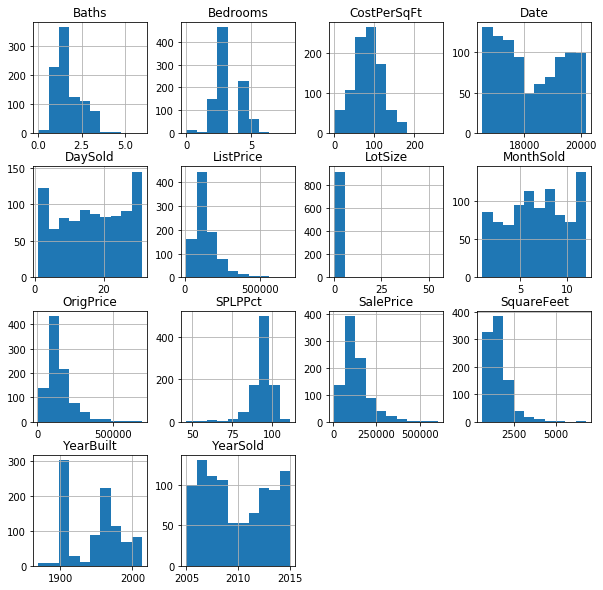

In [113]:
# 2. Is data normalized,
# From this, it doesn't look like, so will normalize the data based on log
houseDataSet.hist(figsize=(10,10))
plt.xticks(rotation=40);

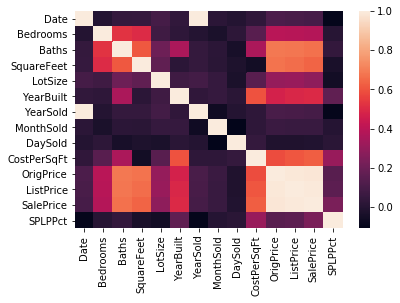

In [114]:
corr = houseDataSet.corr()
sns.heatmap(corr)

In [115]:
#Normalize the dataset based on log for these attributes predictor variables
houseDataSet['OrigPrice'] = np.log(houseDataSet['OrigPrice'])
houseDataSet['SquareFeet'] = np.log(houseDataSet['SquareFeet'])
houseDataSet['YearBuilt'] = np.log(houseDataSet['YearBuilt'])
houseDataSet['ListPrice'] = np.log(houseDataSet['ListPrice'])

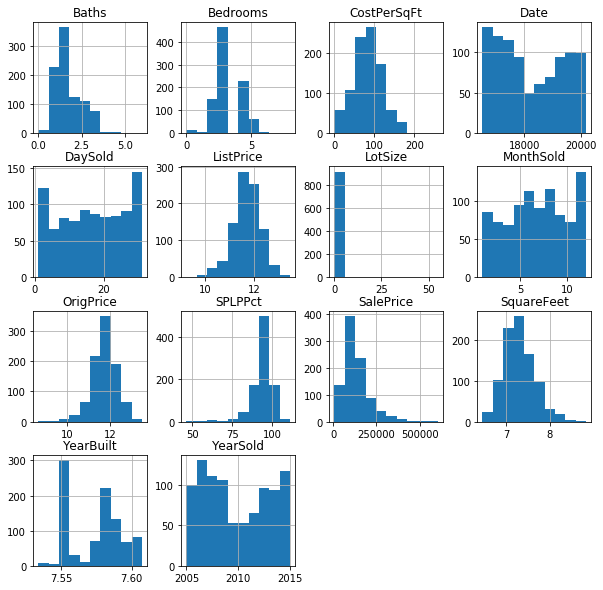

In [116]:
houseDataSet.hist(figsize=(10,10))
plt.xticks(rotation=40);

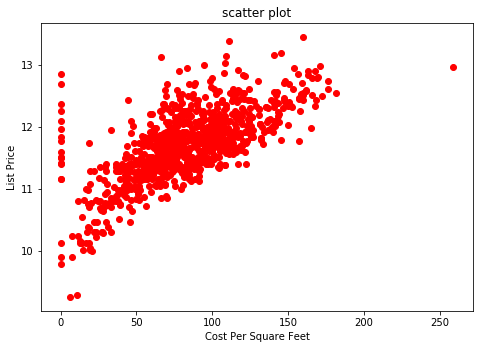

In [117]:
# 3. Is there any pattern on the dataset,
# with the help of scatter plot we are visualizing.
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(houseDataSet["CostPerSqFt"], houseDataSet["ListPrice"], color='r')
ax.set_xlabel('Cost Per Square Feet')
ax.set_ylabel('List Price')
ax.set_title('scatter plot')
plt.show()
# We can observe the positive slope, as Cost Per Square Feet increase, List price is increasing, it's positive relation

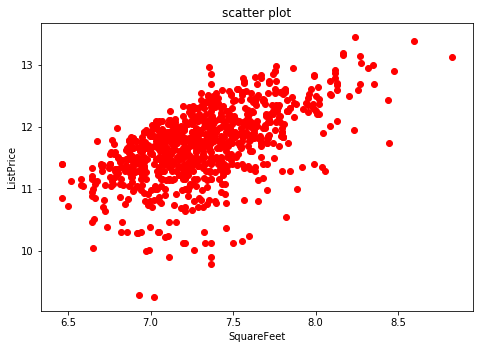

In [118]:
# 4. is there any variables which are correlated to the List price,
# we are opting as it has been considered the final price
# at the time of sale

# Positive correlation we had find in Cost Per Square Feet and Square Feet
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(houseDataSet["SquareFeet"], houseDataSet["ListPrice"], color='r')
ax.set_xlabel('SquareFeet')
ax.set_ylabel('ListPrice')
ax.set_title('scatter plot')
plt.show()
# We can observe the positive slope, as Square Feet increase, List price is increasing, it's positive relation

In [119]:
houseDataSet

,Date,Address,Bedrooms,Baths,SquareFeet,LotSize,YearBuilt,YearSold,MonthSold,DaySold,CostPerSqFt,OrigPrice,ListPrice,SalePrice,SPLPPct
0,16695,1510 First Ave #112,2,1.00,7.021084,0.723463,7.597396,2005,9,16,6.25,9.740969,9.259131,7000,66.67
1,16880,1020 Center St,3,1.00,7.109879,0.172176,7.549609,2006,3,20,22.06,10.463103,10.463103,27000,77.14
2,16875,918 Chatterton St,4,1.00,7.339538,0.723463,7.585789,2006,3,15,18.18,10.896739,10.757903,28000,59.57
3,16833,1023 & 1025 Spring St.,3,1.00,7.050989,0.723463,7.549609,2006,2,1,26.00,11.082143,10.799576,30000,61.22
4,16667,503 2nd Ave,3,1.00,7.152269,0.206612,7.549609,2005,8,19,24.08,10.463103,10.463103,30750,87.86
5,16583,9090 Clay St,3,1.00,6.983790,0.199357,7.549609,2005,5,27,38.92,10.734220,10.734220,42000,91.50
6,16602,1426 Prince,2,1.00,6.643790,0.723463,7.578145,2005,6,15,59.90,11.042922,10.941996,46000,81.42
7,16687,416 Park St,2,1.50,7.049255,0.723463,7.549609,2005,9,8,42.97,10.905956,10.868568,49500,94.29
8,16700,320 Park St,3,2.00,6.815640,0.218000,7.549609,2005,9,21,54.82,11.000432,10.868568,50000,95.24
9,16702,1014 Pearl St,3,2.00,7.305188,0.170000,7.549609,2005,9,23,33.60,10.819778,10.819778,50000,100.00


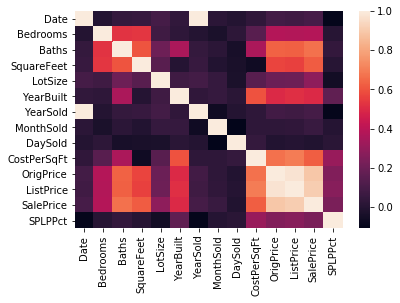

In [120]:
corr = houseDataSet.corr()
sns.heatmap(corr)

In [121]:
# 5. Is there any outliers in the predictor variable which has been picked up
# Noticed some outliers, so trying to observe if we can remove or not, with the help of z-score
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(houseDataSet['LotSize']))
print(z)

[9.12755761e-17 2.26616764e-01 9.12755761e-17 9.12755761e-17
 2.12461507e-01 2.15443548e-01 9.12755761e-17 9.12755761e-17
 2.07780081e-01 2.27511376e-01 9.12755761e-17 1.68863317e-01
 1.80612180e-01 9.12755761e-17 9.12755761e-17 1.80649550e-01
 9.12755761e-17 1.91511727e-01 2.03024670e-01 1.82348558e-01
 9.12755761e-17 9.12755761e-17 1.80612180e-01 2.31622063e-01
 1.91228622e-01 1.32833471e-01 9.12755761e-17 1.75940946e-01
 2.06025584e-01 2.26616764e-01 2.26616764e-01 1.88397571e-01
 1.81319943e-01 9.49728781e-02 1.80612180e-01 9.12755761e-17
 2.03968353e-01 2.30410373e-01 2.12461507e-01 2.08214930e-01
 1.30549756e-01 1.80753733e-01 1.78488892e-01 9.12755761e-17
 2.01609144e-01 3.19209929e-01 9.12755761e-17 1.38788115e-01
 1.22575628e-01 1.62351899e-01 3.23320615e-01 1.72543684e-01
 2.08007320e-01 2.44735492e-01 2.44735492e-01 1.72260579e-01
 1.50178378e-01 9.12755761e-17 9.12755761e-17 2.01231670e-01
 4.42530524e-01 1.84150994e-01 1.98736571e-01 9.12755761e-17
 9.12755761e-17 9.127557

In [122]:
threshold = 3
print(np.where(z > 3))

(array([100, 183, 443, 690, 700, 728, 814, 914, 921, 927, 928], dtype=int64),)


In [123]:
# Omitting the rows as lot size values are seems to be outlier, based on the above Z-score from the above statement
houseDataSet.drop(houseDataSet.index[[100,183,443,690,700,728,814,914,921,927,928]], inplace=True)

In [98]:
houseDataSet

,Date,Address,Bedrooms,Baths,SquareFeet,LotSize,YearBuilt,YearSold,MonthSold,DaySold,CostPerSqFt,OrigPrice,ListPrice,SalePrice,SPLPPct
0,16695,1510 First Ave #112,2,1.00,7.021084,0.723463,7.597396,2005,9,16,6.25,9.740969,9.259131,7000,66.67
1,16880,1020 Center St,3,1.00,7.109879,0.172176,7.549609,2006,3,20,22.06,10.463103,10.463103,27000,77.14
2,16875,918 Chatterton St,4,1.00,7.339538,0.723463,7.585789,2006,3,15,18.18,10.896739,10.757903,28000,59.57
3,16833,1023 & 1025 Spring St.,3,1.00,7.050989,0.723463,7.549609,2006,2,1,26.00,11.082143,10.799576,30000,61.22
4,16667,503 2nd Ave,3,1.00,7.152269,0.206612,7.549609,2005,8,19,24.08,10.463103,10.463103,30750,87.86
5,16583,9090 Clay St,3,1.00,6.983790,0.199357,7.549609,2005,5,27,38.92,10.734220,10.734220,42000,91.50
6,16602,1426 Prince,2,1.00,6.643790,0.723463,7.578145,2005,6,15,59.90,11.042922,10.941996,46000,81.42
7,16687,416 Park St,2,1.50,7.049255,0.723463,7.549609,2005,9,8,42.97,10.905956,10.868568,49500,94.29
8,16700,320 Park St,3,2.00,6.815640,0.218000,7.549609,2005,9,21,54.82,11.000432,10.868568,50000,95.24
9,16702,1014 Pearl St,3,2.00,7.305188,0.170000,7.549609,2005,9,23,33.60,10.819778,10.819778,50000,100.00


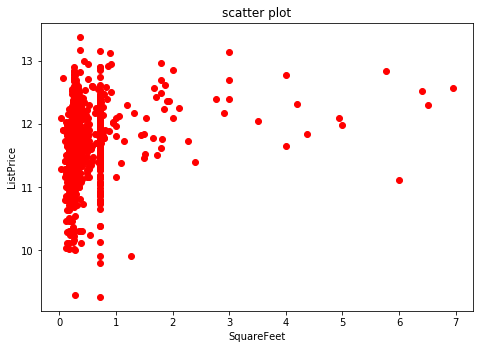

In [124]:
# Even after dropping the outliers, still scatter plot doesn't shows up equally distributed values againts Lot size to List price
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(houseDataSet["LotSize"], houseDataSet["ListPrice"], color='r')
ax.set_xlabel('LotSize')
ax.set_ylabel('ListPrice')
ax.set_title('scatter plot')
plt.show()

In [197]:
# 6. Which Algorithm we can opt for this problem, and does it solve the business problem.
# We can implement linear/Multi Regression 
# With on predictor variable
from patsy import dmatrices
y, X = dmatrices('ListPrice ~ SquareFeet', houseDataSet, return_type="dataframe")
print(X.columns)

Index(['Intercept', 'SquareFeet'], dtype='object')


In [208]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
# the test set will be 20% of the whole data set

In [209]:
# instantiate, fit
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [210]:
print (linreg.intercept_)
print (linreg.coef_)
# for an increase of 1 square feet in house size,
# the house price will go up by ~$0.88, on average

[5.46173647]
[[0.         0.85620035]]


In [212]:
# manually calculated frist row value of x_test array
price = 5.26061 + 7.29*0.8534405
print(price)

11.482191245


In [202]:
#First row will show the same value
# linreg.predict(x_test)

In [213]:
mse = mean_squared_error(y_test, linreg.predict(x_test))
np.sqrt(mse)
# We are getting the Root mean square on high side, because of we are using only one predictor variable, it'll go down 
# when we use multiple predictor variable as shown below

0.5230510922270882

In [214]:
linreg.score(x_test,y_test)
# We can also see that after omitting relevant variables and looking at the R squared coefficient: 29%.
# This means that our model is only able to explain 29% of the variability in list prices.

0.28633597253177767

In [215]:
y_pred = linreg.predict(x_test)

In [229]:
# x_test.shape
# x_test.values.reshape(184,2)

In [177]:
# Multi Regression
# With two predictor variables
from patsy import dmatrices
y, X = dmatrices('ListPrice ~ SquareFeet + CostPerSqFt', houseDataSet, return_type="dataframe")
print(X.columns)

Index(['Intercept', 'SquareFeet', 'CostPerSqFt'], dtype='object')


In [178]:
# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
# the test set will be 20% of the whole data set

In [179]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [180]:
print (linreg.intercept_)
print (linreg.coef_)

[3.49909314]
[[0.         0.98584829 0.01205624]]


In [186]:
#Manual calculation
price = 3.49909314 + 7.323171*0.98584829 + 44.88*0.01205624
print(price)

11.25971279892759


In [187]:
#First row will show the same value
# linreg.predict(x_test)

In [188]:
mse = mean_squared_error(y_test, linreg.predict(x_test))
np.sqrt(mse)

0.2720513843918152

In [189]:
linreg.score(x_test,y_test)
# We can also see that after omitting relevant variables and looking at the R squared coefficient: 76%.
# This means that our model is only able to explain 76% of the variability in list prices.

0.7605680332890268

In [190]:
#7 Is model giving the significant result between the predictor and response variable
# Yes it, based on the observation of one and multi predictor variables we can observer the 76% of the variability 
# in the list prices, from the Multi Linear Reression model.